# Task 3.1 (Icecream selling)
The Dataset from kaggle (https://www.kaggle.com/datasets/mirajdeepbhandari/polynomial-regression/data)

## Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

## Load Data

In [6]:
df = pd.read_csv('Ice_cream selling data.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


## Data Exploration

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [11]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


## Check Duplicates

In [14]:
df[df.duplicated()]

,Temperature (°C),Ice Cream Sales (units)


## Data Visualization 

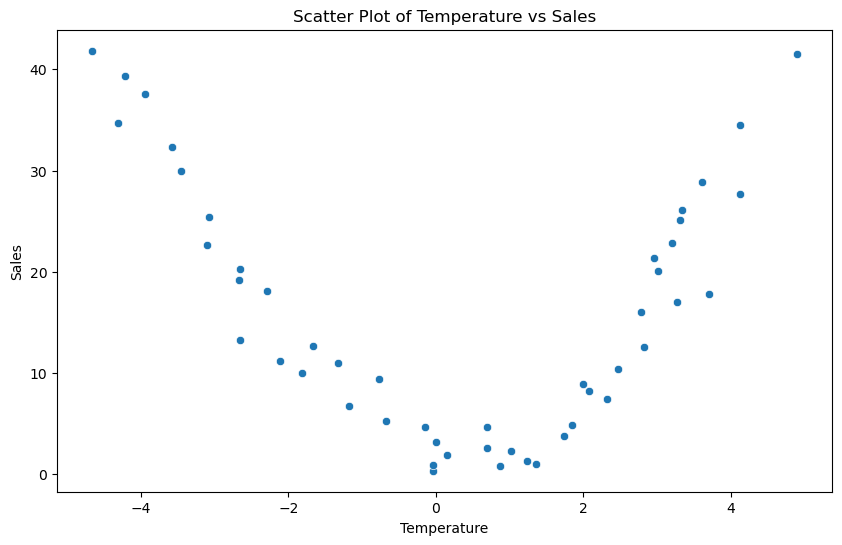

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Ice Cream Sales (units)')
plt.title('Scatter Plot of Temperature vs Sales')
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.show()

## Split Features and Targets

In [22]:
X = df.drop('Ice Cream Sales (units)', axis=1)  
y = df['Ice Cream Sales (units)']

## Split Train and Test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Fitting Linear Regression to the dataset

In [26]:
Linear_regressor = LinearRegression()
Linear_regressor.fit(X,y)

LinearRegression()

## Train the model

In [39]:
y_pred = Linear_regressor.predict(X_test)

### Getting the values of the coefficients

In [41]:
print("These are the predicted Values\n" , y_pred)
print("These are the Actual Values\n" , y_test)

These are the predicted Values
 [17.57045518 13.17162651 12.82956701 13.2459192  16.7376736  15.3060333
 15.42492506 15.56932764 14.64786415 16.24092715 17.80376302 18.97191395
 14.27509091 18.25024982 19.26748505]
These are the Actual Values
 13    10.012868
45    17.843957
47    27.698383
44    28.912188
17     9.392969
27     2.313806
26     0.789974
25     4.625689
31     4.857988
19     4.673643
12    11.218294
4     32.284531
34     7.412094
8     19.226970
3     37.539845
Name: Ice Cream Sales (units), dtype: float64


### Fitting Polynomial Regression to the dataset with degree= 2

In [44]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
Poly_regressor = LinearRegression()
Poly_regressor.fit(X_poly, y)

LinearRegression()

In [46]:
print("B1,B2,B3 =",Poly_regressor.coef_)
print("B0=",Poly_regressor.intercept_)

B1,B2,B3 = [ 0.         -0.82468167  1.82952623]
B0= 2.9517741579934462


## Regression Visualization

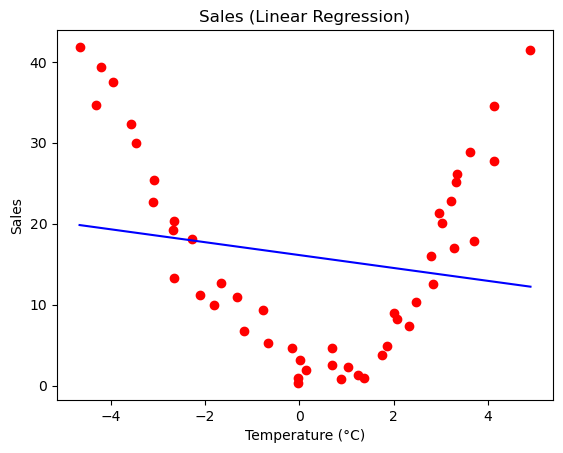

In [55]:
plt.scatter(X, y, color = 'red')
plt.plot(X, Linear_regressor.predict(X), color = 'blue')
plt.title('Sales (Linear Regression)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales')
plt.show()

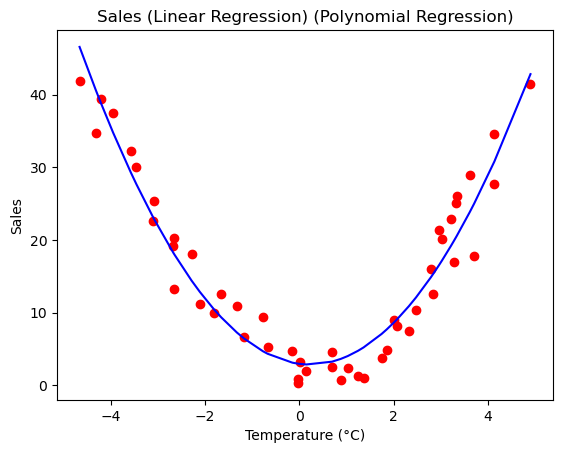

In [53]:
plt.scatter(X, y, color = 'red')
plt.plot(X, Poly_regressor.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Sales (Linear Regression) (Polynomial Regression)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales')
plt.show()

## Use the polynomial model

In [66]:
Poly_regressor.predict(poly_reg.fit_transform([[2.6]]))

array([13.17519913])

## Use the Linear model

In [69]:
Linear_regressor.predict([[2.6]])

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.0509609])